<a href="https://colab.research.google.com/github/KevOdhiambo/Financial-Inclusion-Analysis-East-Africa-/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2022_05_Kevin_Odhiambo_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank's Accessibility Analysis in East Africa


 ## a) Specifying the Data Analytic Question


*   Be able to tell the factors that dettermines whether one has a bank account or not in kenya, Rwanda, Tanzania and Uganda and to what extent
*   Indicate insights on financial inclusion from Kenya, Rwanda, Tanzania and Uganda based on the individuals owning a bank account



  ## b) Defining the Metric for Success

  a). I should be able to find out the demographic variables that determine whether an indiviadual has a bank account or not.

  b). Able to tell if a person do not have a bank account or they have


## c) Understanding the context


 Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

##d) Recording the Experimental Design

  Define research question

  Data Exploration

  Univariate analysis

  Bivariate Analysis

  Multivariate Analysis

  Summary of Findings

  Challenging the solution



## e) Data Relevance
The dataset provided contains vital demographic variables that we can use or our analysis. The dataset also shows the financial services most used by people in the East African countries. The data was extracted from Finscope surveys between 2016 to 2018 and it perfcetly its the context of our analysis.

Further infomation regarding the surveys are here:

FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/

Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016

Finscope Tanzania 2017:  http://www.fsdt.or.tz/finscope/

Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/ 

And for the data, here it is and its variable deinitions:

Variable Definitions: http://bit.ly/VariableDefinitions 

Dataset: http://bit.ly/FinancialDataset


# Loading Libraries and Dataset

In [233]:
#importing Python libraries or use in analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import pandas_profiling as pp
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [234]:
#loading dataset
df =pd.read_csv('Financial Dataset.csv')

In [235]:
#preview first 5 vales in the dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [236]:
#preview last 10 values in the dataset
df.tail(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [237]:
#check for the datatypes for each column
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [238]:
#check for further infomation regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [239]:
#get the data shape
print('This dataset has ' + str(df.shape[0]) + ' rows and ' +  str(df.shape[1]) + ' columns' )

This dataset has 23524 rows and 13 columns


# Cleaning/Tidying the Dataset

In [240]:
#check for data duplicates in the dataset
df.duplicated().sum()

0

In [241]:
#scan through for unique values
for col in df.columns.to_list():
  print(f'In the {col} column these are the unique values: \n')
  
  print(df[col].unique(), end='\n')

In the country column these are the unique values: 

['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
In the year column these are the unique values: 

[2018 2029 2056 2016 2039 2017]
In the uniqueid column these are the unique values: 

['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
In the Has a Bank account column these are the unique values: 

['Yes' 'No' nan]
In the Type of Location column these are the unique values: 

['Rural' 'Urban' nan]
In the Cell Phone Access column these are the unique values: 

['Yes' 'No' nan]
In the household_size column these are the unique values: 

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
In the Respondent Age column these are the unique values: 

[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.

From the unique values identification:
1. I have noticed there are mising values in various columns which needs further data cleaning.

2. There are anomalities in the year column. there are 2029, 2056, and 2039. The survey was conucted from 2016 to 2018.

3. The Level of Education column also has fields with '6' in them which needs to be cleaned as we dont know what 6 means.

4. 'relationship with head' column titles has also been misspelt.

In [242]:
#Drop years greater than 2018
wrong_years = df[df['year'].isin([2029,2056,2039])].index
df.drop(index=wrong_years, inplace=True)


In [243]:
#drop rows with 6 as the level of Education
wrong_ed = df[df['Level of Educuation']== '6'].index
df.drop(index=wrong_ed, inplace=True)

In [244]:
#check column names
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [245]:
#rename the 'The relathip with head' correctly
df.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace=True)

In [246]:
#formart all column names by removing spaces and have them in lower case
df.columns = df.columns.str.lower().str.replace(" ", "_")

#proceed to confimr the names
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

Handling Missing values

In [247]:
#dropping the unique_id column as we dont need it for analysis
df.drop(columns='uniqueid', inplace=True)

In [248]:
#scan through for missing values
df.isnull().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [249]:
#drop all missing values and confirm
df.dropna(inplace=True)

#check if they're dropped
df.isnull().sum()

country                   0
year                      0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

# Data Exploration


## 1) **Univariate Analysis**

###Analysis on Numerical data

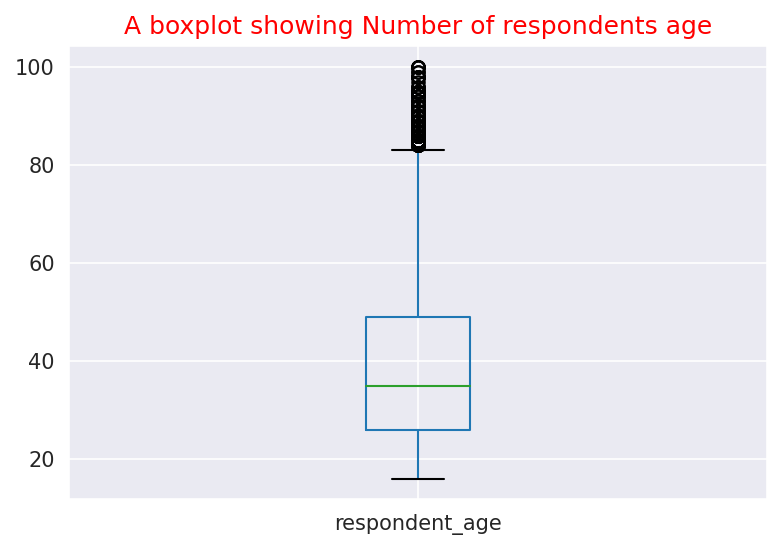

In [250]:
#Check for Outliers using boxplot on respondent_age
plt.figure(dpi = 150)
df.boxplot(['respondent_age'])
plt.title("A boxplot showing Number of respondents age", color = 'red')
plt.show()

from the box plot it shows there are outliers

In [251]:
#check for skewness on Respondent age
df.respondent_age.skew()

0.8412764239448531

the respondent age is moderatlety and positively skewed.

In [252]:
#Check for kurtosis

df['respondent_age'].kurt()


0.10122691422605756

The kurtosis is a leptokurtic.

Text(0.5, 1.0, 'Histograph showing the Respondent age distribution')

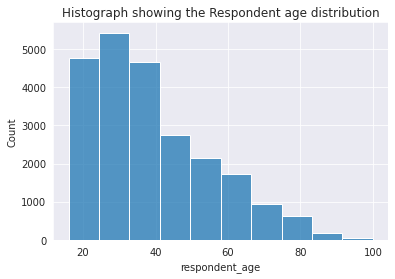

In [253]:
# Plotting the respondent age 
sns.histplot(df['respondent_age'], bins=10)
plt.title('Histograph showing the Respondent age distribution')

The histgraph shows that the respondents between ages 30 to 40 were a majority who were interviewed. With those between 90 to 100 being the least interviewed.

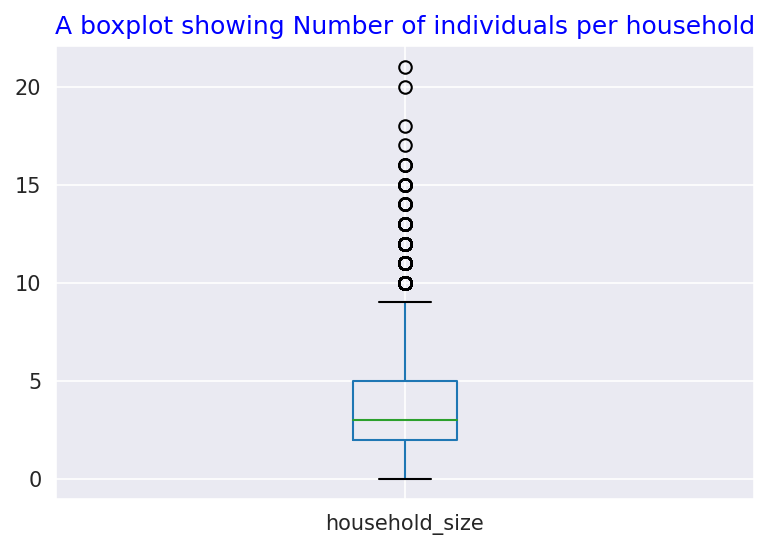

In [254]:
#Next we'll work on the household size as its the other numerical variables in the dataset.
#using a boxplot to show if there are outliers
plt.figure(dpi = 150)
df.boxplot(['household_size'])
plt.title("A boxplot showing Number of individuals per household", color = 'blue')
plt.show()

from the box plot, it shows there are outliers

In [255]:

# check for kurtosis
df.household_size.kurt()

1.1530073057375057

The data is leptokurtic

In [256]:
#cecking for skewness
df.household_size.skew()

0.9737983207814955

this shows the results is strongly skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Plot showing the Household Size Distribution')

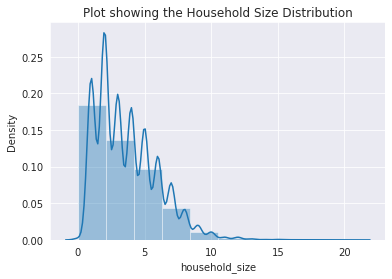

In [257]:
#plot showing the househol size distribution as per the survey
sns.distplot(df['household_size'], bins=10)
plt.title('Plot showing the Household Size Distribution')

### More Analysis Using Visualization

### Pie Chart


In [258]:
#show the proportion o indiviatuals with a bank account
df['has_a_bank_account'].value_counts(normalize=True)*100

No     85.883413
Yes    14.116587
Name: has_a_bank_account, dtype: float64

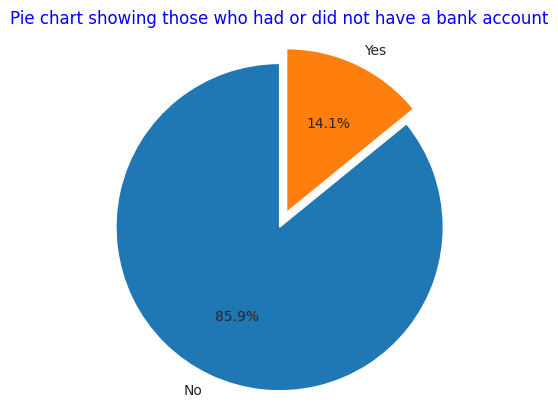

In [259]:
#pie chart showing those who had or did not have a bank account
with_acc = df.has_a_bank_account.value_counts()
with_acc

#reading data to plot

# labels
sizes= with_acc.index
sizes

# values
data = with_acc.values
data

# plotting the pie chart

plt.figure(figsize = (5,5), dpi = 100)
plt.pie(data, labels = sizes, autopct = '%1.1f%%', shadow = False, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('Pie chart showing those who had or did not have a bank account', color = 'blue')
plt.show()

### Bar Chart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


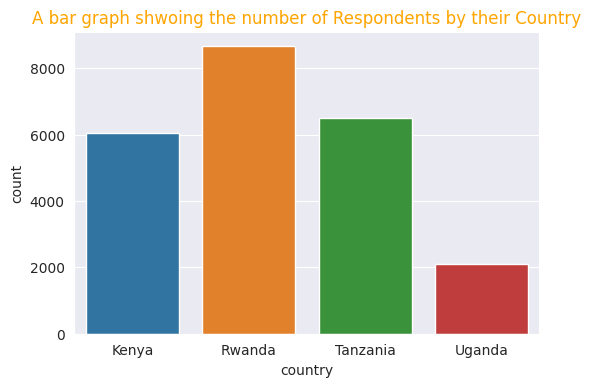

In [260]:
#BAr chart showing respondents alongside their countries
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.country)
plt.title('A bar graph shwoing the number of Respondents by their Country', color = 'orange')
plt.show()

From the graph we can tell that most respondednts were from Rwanda and Uganda having the least.

### Histrogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


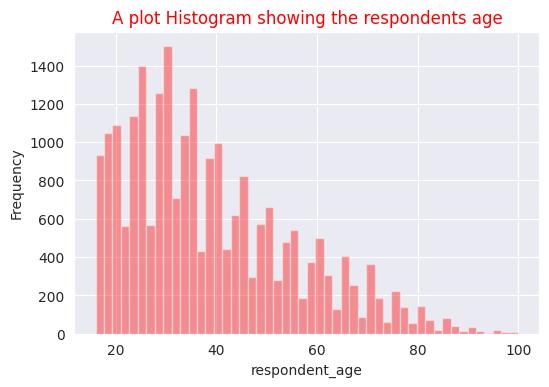

In [261]:
#Histogram showing the Respondents and their age
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.distplot(df['respondent_age'], kde = False, color = 'red')  
plt.title('A plot Histogram showing the respondents age', color = 'red')
plt.ylabel('Frequency')
plt.show()


from the hsitogram we can tell that its skewed to the right.

### Measures of central Tendency

In [262]:
# Describe numerical variables
df[['household_size','respondent_age']].describe()

,household_size,respondent_age
count,23313.000000,23313.000000
mean,3.688414,38.793549
std,2.280842,16.510611
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [263]:
#mode
df.household_size.mode()

0    2.0
dtype: float64

Majority of household size was 2

In [264]:
#mode
df.respondent_age.mode()

0    30.0
dtype: float64

most repondents were of age 30

In [265]:
#median
df.household_size.median()

3.0

the middle value in the household size was 3

In [266]:
#median
df.respondent_age.median()

35.0

The middle age after arranging the respondents age was 35

### Measures of dispersion

In [267]:
# QUANTILES

# household_size quantiles

df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [268]:
# respondent age quantiles
df['respondent_age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

### Frequency Table (Categorical Analysis)

In [269]:
# Frequency table showing the location of respondents

area = pd.crosstab(index = df['type_of_location'], columns = 'count')
area

col_0,count
type_of_location,
Rural,14247
Urban,9066


Majority of the respondents are from the rural areas

In [270]:
# Frequncy table indicating the respondent marital status categories along with their counts

marital_status = pd.crosstab(index = df['marital_status'], columns = 'count')
marital_status



col_0,count
marital_status,
Divorced/Seperated,2047
Dont know,8
Married/Living together,10682
Single/Never Married,7899
Widowed,2677


Most of the respondents are Married/Living together based on the requency table while the least were those who 'Dont Know' their marital status.

In [271]:
# Frequncy table indicatin the number o those ointerviewd who had an access to a cell phone


cell_phone = pd.crosstab(index = df['cell_phone_access'], columns = 'count')
cell_phone

 

col_0,count
cell_phone_access,
No,5998
Yes,17315


the frequency table shows that most of those interviewed had cell phone access

## 2) **Bivariate Analysis**

### Correlation

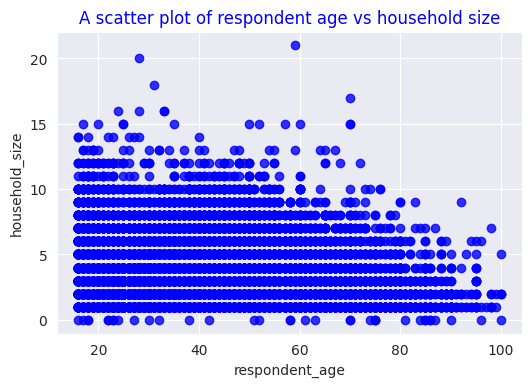

In [272]:
#here we are going to analyse two variables to determine their relationships and causes

#showing corelation between respondent age and household size using a scatter plot

plt.figure(dpi = 100)
sns.regplot(x= df['respondent_age'], y= df['household_size'], fit_reg = False, color = 'blue')
plt.title("A scatter plot of respondent age vs household size", color = 'blue')
plt.show()


From the scatter plot, it shows a weak negative correlation between the household size and respondents age 

In [273]:
#calculating the correlation between the household size and repsondent age variables

df['respondent_age'].corr(df['household_size'])

-0.11918485538538871

Also from the calculation, it shows a weak neative correlation

Correlation for the whole dataset

In [274]:
#fnding the correlation for the whole dataset with numerical variables
df.corr()

,year,household_size,respondent_age
year,1.000000,-0.052524,-0.017608
household_size,-0.052524,1.000000,-0.119185
respondent_age,-0.017608,-0.119185,1.000000


###Test Hypotheses

In [275]:
#To get the right hypotheses, we need to drop some variables that add no value in the analysis, like marital status=dont know, level of education=dont know

#find out rows with 'refuse to answer' and 'dont know' and drop them
job = df[df['type_of_job'] == 'Dont Know/Refuse to answer'].index.to_list()

marital_status = df[df['marital_status'] == 'Dont know'].index.to_list()

education = df[df['level_of_educuation'] == 'Other/Dont know/RTA'].index.to_list()


remove = set(education + marital_status + job)
# Drop rows with identified indices
df.drop(index=remove, inplace=True)

In [276]:
#Chi Square Test on whether relationship between level of education and if the respondent has a bank account or not

edu_level = pd.crosstab(df['has_a_bank_account'], df['level_of_educuation'])
edu_level

#chi square test whether the relationship between level of education and if the respondent has a bank account or not.

#Null Hypothesis : Level of education do not have an influence on if an individual do not or have a bank account
#Alternative Hypothesis : Level of education has an influence on if an individual has a bank account or not




level_of_educuation,No formal education,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
has_a_bank_account,,,,,
No,4273,11529,3202,554,345
Yes,176,1078,973,587,455


In [277]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(edu_level.to_numpy())
 
#calculating the critical value and setting the significance level =0.05

critical_value = chi2.ppf(prob, dof)
prob = 0.95
 
print(f'Probability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Probability: 0.95, Critical value: 9.487729036781154, Test statistic: 3511.46942026072
Alpha: 0.050000000000000044, p-value: 0.0


We reject the null hypothesis as alpha is less than the P-value

## 3) **Mulitivariate** **Analysis**

Text(0.5, 1.0, 'Individuals with bank accounts')

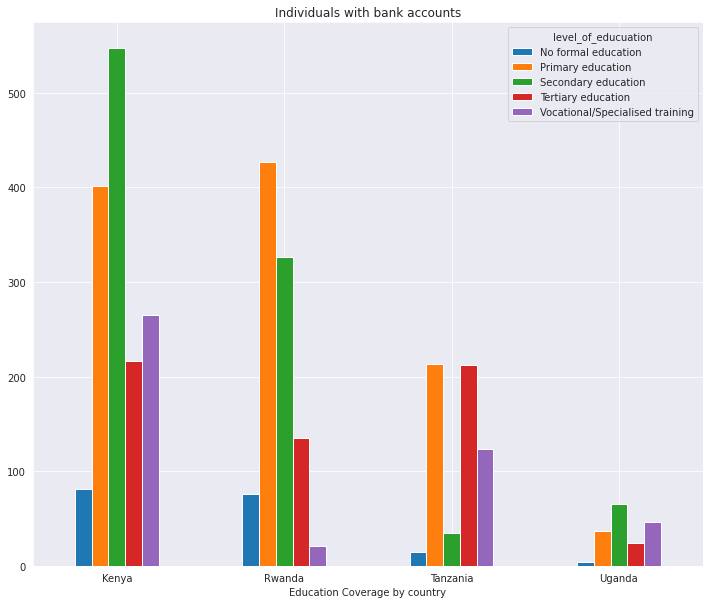

In [278]:
#under multivariate analysis we analyse more than two variables. 
#as such, we investigate the relationship between level of education, country and bank account status

edu_per_country = pd.crosstab(index=[df['has_a_bank_account'],df['country']], columns=df['level_of_educuation'])

#plot showing those with bank accounts
edu_per_country.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education Coverage by country')
plt.title('Individuals with bank accounts')





From the bar graph you can tell that:
1. In Kenya majority with bank accounts attained secodnary education
2. In Rwanda, those who attained primary education were the majority with bank accounts
3. Tanzania, Majority who attained primary education had accounts followed closely with those with tertiar education.
4. In Uganda, those with ban accounts attained secondary eduaction.

Text(0.5, 1.0, 'individuals without a bank account')

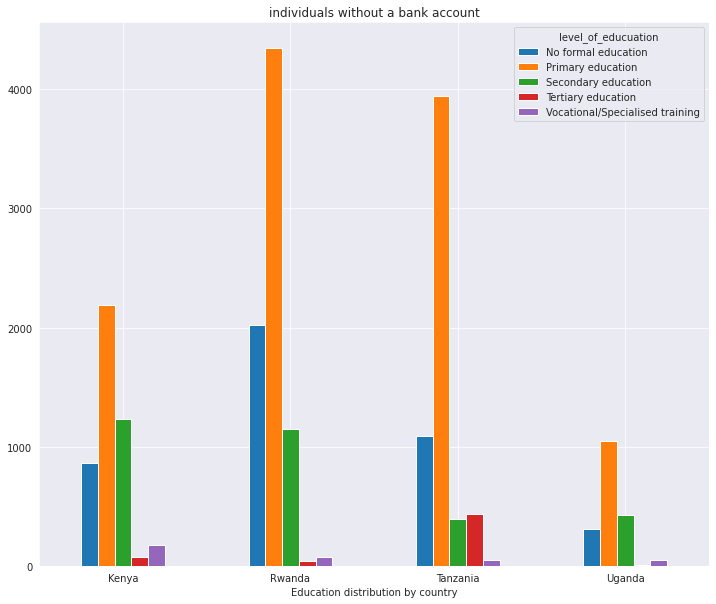

In [279]:
#plot showing those with no bank accounts
edu_per_country.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education distribution by country')
plt.title('individuals without a bank account')

For those with no bank accounts, we can tell that majority with primary level of eduaction in all the countries had no bank accounts.

###Reduction Techniques

### 1.1 Linear Discriminant Analysis

In [280]:
#we need to encode the data into dummies for easier analysis on categorical data
#dummies makes the data easy to compare and quantify


dummy_df = pd.get_dummies(df[['country', 'type_of_location', 'cell_phone_access', 'gender_of_respondent','the_relathip_with_head', 'marital_status', 'level_of_educuation', 'type_of_job']])
dummy_df.head()




,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,...,level_of_educuation_Vocational/Specialised training,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [281]:
#for comparison purposes wth the initial dataset, we will concatnate the two datarames
new_df = pd.concat([df, dummy_df], axis = 1)
new_df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,...,level_of_educuation_Vocational/Specialised training,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,...,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,...,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,...,1,0,0,0,0,0,0,0,0,1
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,...,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,...,0,0,0,0,0,1,0,0,0,0


In [282]:
#To begin the LDA, I divide the dataset into features (z) and corresponding labels (k)
#the i proceed to divide the resultant dataset into test and training sets

z = new_df.iloc[:, 12:].values
s = new_df.iloc[:, 2].values

In [283]:
s

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [284]:
z

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [285]:
#Next i divide the data into training and test sets
#
from sklearn.model_selection import train_test_split

z_train, z_test, s_train, s_test = train_test_split(z, s, test_size=0.2, random_state=0)

In [286]:
#doing the feature scaling. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
z_train = sc.fit_transform(z_train)
z_test = sc.transform(z_test)

In [287]:
#carry out LDA using Scikit-Learn library

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=24)
z_train = lda.fit_transform(z_train, s_train)
z_test = lda.transform(z_test)

ValueError: ignored

In [288]:
#Training and Making Predictions using the random forest classifier in evaluatin the performance
from sklearn.ensemble import RandomForestClassifier

first_class = RandomForestClassifier(max_depth=2, random_state=0)
first_class.fit(z_train, s_train)

# # predicting the Test set results

s_pred = first_class.predict(z_test)

In [289]:
#Evaluating the Performance of the algorithm Using a confusion matrix and the accuracy score.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

matrix1 = confusion_matrix(s_test, s_pred)
print(matrix1)
print('Accuracy' + str(accuracy_score(s_test, s_pred)))

[[3971    0]
 [ 664    0]]
Accuracy0.8567421790722761


The LDA classifier has a 85.67% accuracy.

# Findings Summary

There are more individuals without a bank account(85%) in comparison to those with a bank account in the East African Countries.

The Type of education one has has an impact on one having a bank account. in all countries those with primary education, had no bank accounts.


# Challenging the Solution

To get further relationshps between categorical data or perfom further analysis, we might need to use other ways for analysis such as ANOVA to identify the relationships. 